
# Why do stars have different colors?



<h2>An introduction to blackbody radiation</h2>

<img src="suppinfo/eta-carinae.jpg" width="400px">

<center>η Carinae</center>

S. Singleton, adapted from

-   [http://www.lasalle.edu/~gentry/C332/Lab.%20Blackbody%20Radiation.pdf](http://www.lasalle.edu/~gentry/C332/Lab.%20Blackbody%20Radiation.pdf)
-   I2 of Shepherd & Grushow, **Quantum Chemistry & Spectroscopy: A Guided Inquiry**
-   [What's in a Star?]([https://chemlinks.beloit.edu/Stars/index.html](https://chemlinks.beloit.edu/Stars/index.html)) ChemLinks module




## Content:



-   blackbody radiation, Raleigh-Jeans law, Planck law
-   relationships between temperature, energy, emissivity, and observed color
-   relationship between temperature and emissivity
-   stellar emission spectra




## Skills:



-   applying functions to arrays
-   numerical integration
-   interactive plots
-   (optional) symbolic manipulation




## Background Information



-   ChemWiki [Blackbody Radiation]([http://chemwiki.ucdavis.edu/Core/Physical_Chemistry/Quantum_Mechanics/01._Waves_and_Particles/Classical_vs._Quantum_Mechanics/Blackbody_Radiation](http://chemwiki.ucdavis.edu/Core/Physical_Chemistry/Quantum_Mechanics/01._Waves_and_Particles/Classical_vs._Quantum_Mechanics/Blackbody_Radiation))
-   YouTube TMPChem [Quantum Chemistry - Blackbody Radiation]([https://www.youtube.com/watch?v=MyagbJZBTkU](https://www.youtube.com/watch?v=MyagbJZBTkU))
-   Wikipedia [Blackbody radiation]([https://en.wikipedia.org/wiki/Black-body_radiation](https://en.wikipedia.org/wiki/Black-body_radiation))




# Python Environment



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd 
%matplotlib inline


# Are all stars “red hot”?



Astronomers are interested in knowing the temperature of a star because it provides clues about the star's composition, and the state of matter within. To learn what elements are present in stars, it is necessary to know more about how stellar temperature is measured. In this notebook, we will explore the question *What is the relationship between the color of a star and its temperature?*




## How are stars classified?



In the early part of this century, the director of the Harvard College Observatory, [E. C Pickering](https://en.wikipedia.org/wiki/Edward_C._Pickering) and his collaborators, [Williamina P. S. Flemming](https://en.wikipedia.org/wiki/Williamina_Fleming), [Antonia C. Maury](https://en.wikipedia.org/wiki/Antonia_Maury), and [Annie J. Cannon](https://en.wikipedia.org/wiki/Annie_Jump_Cannon), began a large study of nearly a quarter of a million stars. The result of their survey was a stellar classification system [https://en.wikipedia.org/wiki/Stellar_classification](https://en.wikipedia.org/wiki/Stellar_classification). Under this scheme, stars are classified into seven lettered categories that describe the surface temperature of a star: O, B, A, F, G, K, M. Class O stars are hottest, while class M stars are coolest. The Sun is a class G star, with a surface temperature of about 5,800 Kelvin. The table below summarizes the stellar classes and a temperature range that defines each.

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-left" />

<col  class="org-left" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-left">Surface Temperature (K)</th>
<th scope="col" class="org-left">Class</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-left">30,000</td>
<td class="org-left">O</td>
</tr>


<tr>
<td class="org-left">11,000-30,000</td>
<td class="org-left">B</td>
</tr>


<tr>
<td class="org-left">7,500-11,000</td>
<td class="org-left">A</td>
</tr>


<tr>
<td class="org-left">6,000-7,500</td>
<td class="org-left">F</td>
</tr>


<tr>
<td class="org-left">5,000-6,000</td>
<td class="org-left">G</td>
</tr>


<tr>
<td class="org-left">3,500-5,000</td>
<td class="org-left">K</td>
</tr>


<tr>
<td class="org-left">3,500</td>
<td class="org-left">M</td>
</tr>
</tbody>
</table>

As a first step in understanding what the color of stars tells us, we will focus upon objects that emit or give off radiation, such as stars and heated solids, and also those that do not emit visible light. We will consider the color and temperature of these objects and answer the question, **Are all red objects "red hot"?**




# Models for Black Body Radiation




## [Rayleigh-Jeans](https://en.wikipedia.org/wiki/Rayleigh%E2%80%93Jeans_law)



A *classical* model suggesting a blackbody radiator can have any energy.

\begin{equation}
B_\lambda = \frac{2ckT}{\lambda^4}
\end{equation}




## [Planck](https://en.wikipedia.org/wiki/Max_Planck#Black-body_radiation)



A *quantized* model suggesting a blackbody radiator comprises oscillators of discrete energies.

\begin{equation}
  \rho(\lambda, T)\;d\lambda = \frac{8 \pi h c}{\lambda^5
  \left (e^{hc/\lambda kT} -1 \right ) } \;d\lambda
\end{equation}

Plotting these model functions gives these curves:

<img src="suppinfo/Black-body.svg.png" width="60%">



**CTQ 1**
Using SI units for each term in the Planck equation, determine the units for $\rho$. (Answer: J/m<sup>2</sup>s)



**CTQ 2**
There are two curves labeled 5000K, representing two different models.  Match the curves with their model functions. Why do the curves have dramatically different shapes? (Hint: examine the terms in each model function).



**CTQ 3**
Using best practices (concise, calls attention to key features of plot), write a caption for the figure above.




# Partially Worked Example: Emission of a blackbody radiator



Use the Planck relationship to model the emission spectrum of a blackbody radiator as a function of &lambda;.



In [3]:
# define common constants
from scipy.constants import  Planck, speed_of_light, Boltzmann
h = Planck  # Js
c = speed_of_light  # m/s
kb = Boltzmann  # J/molec K

# use "lamda" to avoid conflict with python reserved word "lambda"
def rho(wavelength, T):
    """Calculate the emission from wavelength and temperature.

    Arguments::
    lamda: wavelength cm
    T: temperature K"""

    return 8 * np.pi * h * c / ( wavelength**5 * (np.exp(h*c/(wavelength*kb*T)) - 1))

**Exercise 1**
Use the model function `rho()` to plot the predicted emission spectra for a K-type star and a G-type star from the UV to IR wavelength region (say, 100 to 3000 nm).



In [4]:
wavelength =np.linspace(1*10**-7, 3*10**-6,1000)
wavelength

array([1.00000000e-07, 1.02902903e-07, 1.05805806e-07, 1.08708709e-07,
       1.11611612e-07, 1.14514515e-07, 1.17417417e-07, 1.20320320e-07,
       1.23223223e-07, 1.26126126e-07, 1.29029029e-07, 1.31931932e-07,
       1.34834835e-07, 1.37737738e-07, 1.40640641e-07, 1.43543544e-07,
       1.46446446e-07, 1.49349349e-07, 1.52252252e-07, 1.55155155e-07,
       1.58058058e-07, 1.60960961e-07, 1.63863864e-07, 1.66766767e-07,
       1.69669670e-07, 1.72572573e-07, 1.75475475e-07, 1.78378378e-07,
       1.81281281e-07, 1.84184184e-07, 1.87087087e-07, 1.89989990e-07,
       1.92892893e-07, 1.95795796e-07, 1.98698699e-07, 2.01601602e-07,
       2.04504505e-07, 2.07407407e-07, 2.10310310e-07, 2.13213213e-07,
       2.16116116e-07, 2.19019019e-07, 2.21921922e-07, 2.24824825e-07,
       2.27727728e-07, 2.30630631e-07, 2.33533534e-07, 2.36436436e-07,
       2.39339339e-07, 2.42242242e-07, 2.45145145e-07, 2.48048048e-07,
       2.50950951e-07, 2.53853854e-07, 2.56756757e-07, 2.59659660e-07,
      

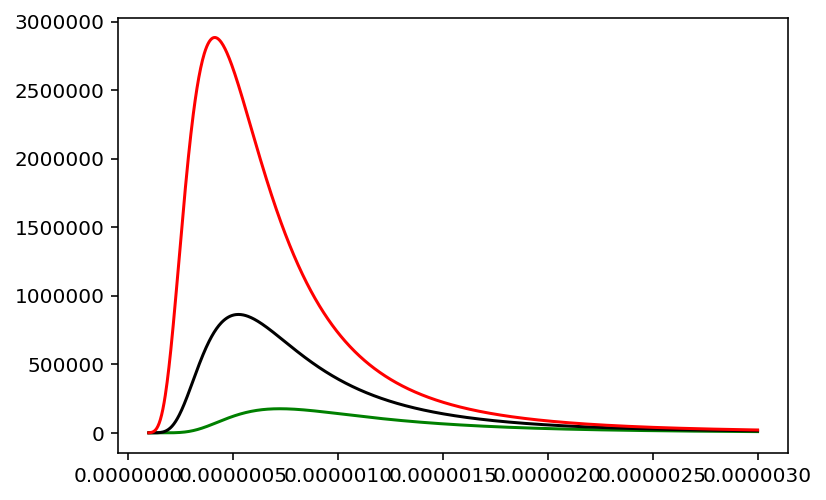

In [5]:
TK = 4000   # temperature of a K-type star
TG = 5500   # temperature of a G-type star
TF = 7000   # temperature of a F-type star
IntensityK = rho(wavelength,TK)
IntensityG = rho(wavelength,TG)
IntensityF = rho(wavelength,TF)

plt.figure()
plt.plot(wavelength,IntensityK,'g-')
plt.plot(wavelength, IntensityG,'k-')
plt.plot(wavelength, IntensityF, 'r-')

**CTQ 4**
Referring to the plot and the model function, identify at least three characteristics blackbody radiation.




## Emission as a function of $\nu$



Alternatively, the blackbody emission can be modeled using frequency $\nu$. [Optional algebra problem: Try using the relationship $c = \lambda \nu$ to derive the Planck relationship in terms of frequency instead of wavelength.]

\begin{equation}
\rho(\nu, T) = \frac{8\pi h \nu^3}{c^3} \frac{1}{e^{h\nu/kt}-1}
\end{equation}



**Exercise 2**
Using Planck's equation for blackbody radiation, write a function called `rhonu` that returns the emission given $\nu$ and $T$. Use this function to plot emission spectra for stars at 4000K and 5000K (including axes). Record your observations. Here is a skeleton to get you started.



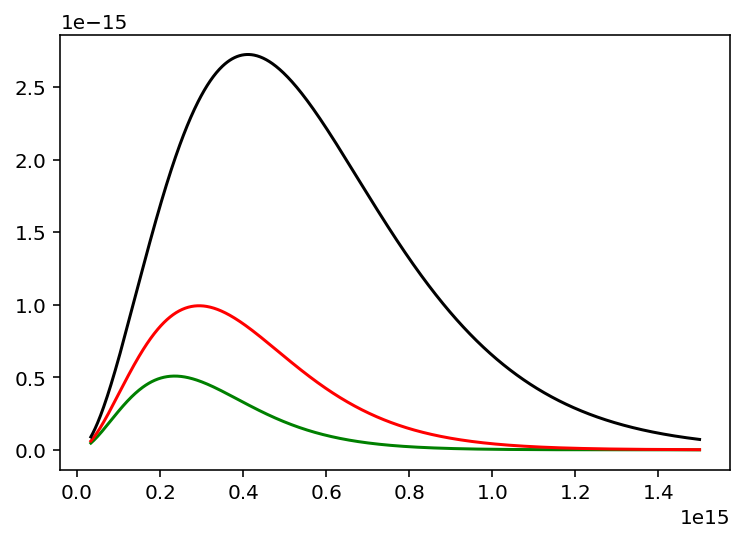

In [6]:
def rhonu(nu, T):
    """Calculates the radiance from frequency and temperature.

    Arguments
    nu: frequency Hz
    T: temperature K
    """

    return  (8 * np.pi * h * nu**3 / c**3) * (1 / (np.exp(h*nu/(kb*T)) - 1))

nu1 = c/200e-9
nu2 = c/900e-8     # frequency


x = np.linspace(nu1,nu2,1000)
y=rhonu(x,4000)

plt.figure()
plt.plot(x,rhonu(x,4000),'g')
plt.plot(x,rhonu(x,5000),'r')
plt.plot(x,rhonu(x,7000),'k')      # Intensity versus frequency


#rhonu(nu,4000)


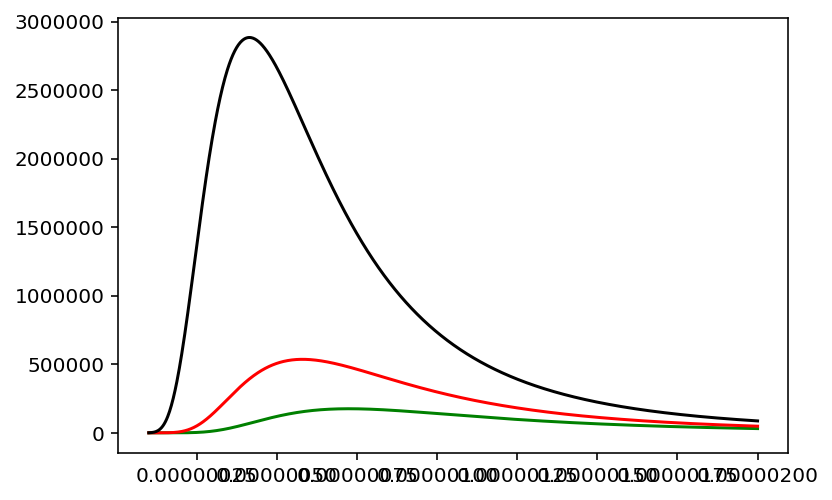

In [7]:
wavelength =np.linspace(100e-9, 2000e-9, 1000)

plt.figure()
plt.plot(wavelength,rho(wavelength, 4000),'g')   # The function for intensity versus wavelength for a K-type star
plt.plot(wavelength,rho(wavelength, 5000),'r')   # The function for intensity versus wavelenght for a G-type star
plt.plot(wavelength,rho(wavelength,7000),'k')    # The function for intensity versus wavelength for a F-type star

In [8]:
from scipy.constants import Planck, speed_of_light, Boltzmann
h =  Planck  #Js
c = speed_of_light   #m.s
kb = Boltzmann    # J/molec K

def rhonu(nu, T):
    """
    Return emission intensity as function of frequency and temperature.
    
    Arguments::
    nu =  frequency Hz
    T =  temperature K
    """
    
    return 2*h*nu**2/c**2 * 1/(np.exp(h*nu/(kb*T)-1))

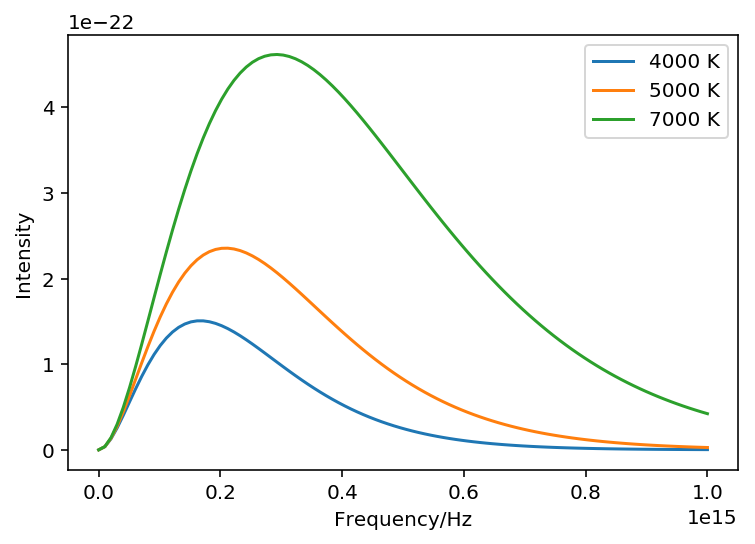

In [9]:
nus = np.linspace(1e10, 1e15, 100)
for T in [4000, 5000, 7000]:
    plt.plot(nus,rhonu(nus, T), label='%s K'%T)
plt.xlabel('Frequency/Hz')
plt.ylabel('Intensity')
plt.legend()


## Modeling the emission of stars of different classes 



## Temperatures and colors of M, K, and G stars


**Exercise 3**
Use your function to plot the blackbody emission curves at temperatures corresponding to F, G, and K stars. Speculate as to the color of these stars, and explain your reasoning.

Hints: Note that the x- and y-axis units will be different from plots in Fig 1 and the Worked Example. (Typical emission intensities are on the order of $10^5$ for temperatures around 5000 K.)



14 282828282828282.9 4.611574428565192e-22
10 202020202020202.03 2.352844096206731e-22
8 161616161616161.62 1.5058202215723077e-22


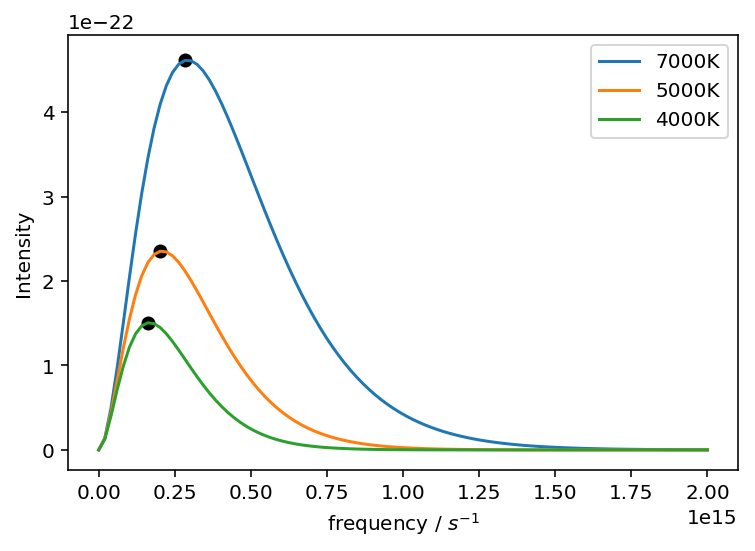

In [10]:
#wl = np.linspace(1e-8, 25e-7, 1000)
nus = np.linspace(0, 2e15, 100)   #Hz
for t in [7000, 5000, 4000]:
    y = rhonu(nus,t)
    plt.plot(nus, rhonu(nus, t), label=(f'{t}K'))
    mx = np.argmax(y)
    print(mx,nus[mx],y[mx])     # This operation will print all the lambda maximum frequency values and all the maximum y values for each varied temperature curve. 
    plt.scatter(nus[mx], y[mx], c='k')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel(r'frequency / $s^{-1}$')
plt.ylabel('Intensity')
plt.legend()


# Comparing the temperatures of stars



**CTQ 6**
Below are emission spectra for an F-type and a G-type star. Assign each spectrum to its star type, and compare and contrast the emission spectra (be specific about the information that can be elucidated).

<img src="figures/f-spDR2-006.gif" width=48%><img src="figures/g-spDR2-008.gif" width=48%>

[http://classic.sdss.org/dr5/algorithms/spectemplates/index.html](http://classic.sdss.org/dr5/algorithms/spectemplates/index.html)



In [11]:
fn = 'data/ukg5iii.csv'
G = pd.read_csv(fn, skiprows=3, names=["wavelength", "intensity"])

# convert Angstroms to meters
wavelength = G.wavelength / 1e10 

# normalize intensity
em_star = G.intensity / np.max(G.intensity)

plt.plot(wavelength, em_star, 'k', lw=0.5)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Wavelength / m");
plt.ylabel("Intensity")
plt.title("Experimental Analysis of Intensity Plotted against Wavelength /m")

# This is the experimental analysis of the plot of Intensity versus wavelength from the imported data

FileNotFoundError: File b'data/ukg5iii.csv' does not exist

In [0]:
plt.plot(wavelength, em_star)

T = 5300 # temperature of a K-type star

em_calc = rho(wavelength, T)

em_norm = em_calc/np.max(em_calc)

plt.plot(wavelength, em_norm)

plt.xlabel("wavelength /m")
plt.ylabel("Intensity")
plt.title("Calculated Results for Intensity Plotted against Wavelength /m")

# I made a normalization curves, while varying the temperature to see if I could get my calculated curve as close as possible to the experimental analysis curve. Then I overlayed my generated curve on the experimental analysis curve.

## Using Curve_fit()

In [0]:
from scipy.optimize import curve_fit

def model(wavelength, T):
    em_calc =  rho(wavelength, T)  # calculated emission
    print(em_calc)
    em_norm = em_calc/np.max(em_calc)   # normalize calculated emission
    return em_norm

T = 4000  # initial estimation for temperature of a K-type star
popt, pcov = curve_fit(model, wavelength, T)    # for curve_fit, model comes first, then the x and y data of which we are comparing the model to.
popt

In [0]:
plt.plot(wavelength, em_star)
plt.plot(wavelength, model(wavelength, *popt))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel("Normalizaed Intensity")
plt.xlabel("Wavelength/m")

## Comparing Planck model to the Wien model

In [0]:
def wien(T):
    "lambda_max for Wein law; T is temperature in K."
    l_max = 2.89e-3 / T
    return l_max

temps = np.arange(1000,10001,1000)

planck_list =[]
wien_list = []
for temp in temps:
    y = rho(wavelength, temp)
    max_y = np.argmax(g)
    wavelength = wavelength[max_y]
    planck_list.append(wavelength)
    
    planck_list.append(wavelength[np.argmax(rho(wavelength,temp))])
    wein_list.append(wien(temp))
    
    print("Wien)\t\t\tPlanck")
    for w,p in zip(wien_list, planck_list):
        print("f{w:.3e} \t\t {p:.3e}")

In [0]:
plt.plot(wien_list, planck_list, 'o')
plt.xlabel("Wien max")
plt.ylabel("Planck max")

In [0]:
np.polyfit(wien_list,planck_list, 1)


# Estimating the temperature of a star



This is the emission spectrum of a moderate temperature main sequence star.



In [0]:
import pandas as pd
G = pd.read_csv('data/ukg5iii.csv', skiprows=3, names=['wavelength','intensity'])
plt.plot(G.wavelength, G.intensity, 'k', lw=0.5)
plt.ylabel('Intensity')
plt.xlabel(r'Wavelength / $\AA$')

**CTQ 7**
Using one of the model functions `rho()` or `rhonu()`, how could the temperature of this star be estimated?



**Exercise 4**
Estimate the temperature of the star shown above.

